<a href="https://colab.research.google.com/github/TimothyPanggabean/CentralAI-MiniProjects/blob/main/Portofolio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pylab as plt
from statsmodels.graphics.gofplots import qqplot
from IPython.core.interactiveshell import InteractiveShell

In [ ]:
sales_data = pd.read_csv('penjualan_ringan.csv')
sales_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...,...
86594,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
86595,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
86596,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
86597,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
"Head"
sales_data.head() # Checking the first 5 rows of data
"Tail"
sales_data.tail() # Checking the last 5 rows of data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
86594,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
86595,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
86596,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
86597,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"
86598,25116,319670,Bose SoundSport Headphones,1,99.99,12/21/19 21:45,"747 Chestnut St, Los Angeles, CA 90001"


# Preprocessing

In [ ]:
# getting the information
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86599 entries, 0 to 86598
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        86599 non-null  int64 
 1   Order ID          86599 non-null  object
 2   Product           86599 non-null  object
 3   Quantity Ordered  86599 non-null  object
 4   Price Each        86599 non-null  object
 5   Order Date        86599 non-null  object
 6   Purchase Address  86599 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.6+ MB


In [ ]:
categorical = sales_data.select_dtypes(['category', 'object']).columns # getting the Uniqueness catrgorical variable
for col in categorical:
    print('{} : {} unique value(s)'.format(col, sales_data[col].nunique()))

Order ID : 83002 unique value(s)
Product : 20 unique value(s)
Quantity Ordered : 9 unique value(s)
Price Each : 24 unique value(s)
Order Date : 64575 unique value(s)
Purchase Address : 74088 unique value(s)


In [ ]:
# get the number of missing data points per column
missing_values_count = sales_data.isnull().sum()
# look at the # of missing points in the first ten columns
missing_values_count[0:10]

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [ ]:
# how many total missing values do we have?
total_cells = np.product(sales_data.shape)
total_missing = missing_values_count.sum()
# percent of data that is missing
percent_missing = (total_missing / total_cells) * 100
print(f"{percent_missing:.2f}%")

0.00%


In [ ]:
# let's drop the rows of NaN data!
sales_data = sales_data.dropna(how='all')
# okay, let's check it again!
"NaN Value:"
sales_data[sales_data.isna().any(axis=1)]
# future warning! ValueError: invalid literal for int() with base 10: 'Or'
"Clean Future Warnings:"
sales_data = sales_data[sales_data['Order Date'].str[0:2] != 'Or']
sales_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,236670,Wired Headphones,2,11.99,08/31/19 22:21,"359 Spruce St, Seattle, WA 98101"
1,1,236671,Bose SoundSport Headphones,1,99.99,08/15/19 15:11,"492 Ridge St, Dallas, TX 75001"
2,2,236672,iPhone,1,700.0,08/06/19 14:40,"149 7th St, Portland, OR 97035"
3,3,236673,AA Batteries (4-pack),2,3.84,08/29/19 20:59,"631 2nd St, Los Angeles, CA 90001"
4,4,236674,AA Batteries (4-pack),2,3.84,08/15/19 19:53,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...,...
86594,25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
86595,25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
86596,25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
86597,25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
# convert the data
sales_data['Quantity Ordered'], sales_data['Price Each'] = sales_data['Quantity Ordered'].astype('int64'), sales_data['Price Each'].astype('float')
# and check it
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86439 entries, 0 to 86598
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        86439 non-null  int64  
 1   Order ID          86439 non-null  object 
 2   Product           86439 non-null  object 
 3   Quantity Ordered  86439 non-null  int64  
 4   Price Each        86439 non-null  float64
 5   Order Date        86439 non-null  object 
 6   Purchase Address  86439 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 5.3+ MB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# convert it using to_datetime() funct
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
# let's see it
sales_data

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101"
1,1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001"
2,2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035"
3,3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001"
4,4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001"
...,...,...,...,...,...,...,...
86594,25112,319666,Lightning Charging Cable,1,14.95,2019-12-11 20:58:00,"14 Madison St, San Francisco, CA 94016"
86595,25113,319667,AA Batteries (4-pack),2,3.84,2019-12-01 12:01:00,"549 Willow St, Los Angeles, CA 90001"
86596,25114,319668,Vareebadd Phone,1,400.00,2019-12-09 06:43:00,"273 Wilson St, Seattle, WA 98101"
86597,25115,319669,Wired Headphones,1,11.99,2019-12-03 10:39:00,"778 River St, Dallas, TX 75001"


In [ ]:
def augment_data(data):

    """
    Adding new features to
    our data, adding Month Data,
    Hour Data, Minute Data, Sales Data,
    and Cities Column

    Returning:
        data with new features
    """

    # funtction to get the city in the data
    def get_city(address):
        return address.split(',')[1]

    # funtction to get the state in the data
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    # let's get the year data in order date column
    data['Year'] = data['Order Date'].dt.year

    # let's get the month data in order date column
    data['Month'] = data['Order Date'].dt.month

    # let's get the houe data in order date column
    data['Hour'] = data['Order Date'].dt.hour

    # let's get the minute data in order date column
    data['Minute'] = data['Order Date'].dt.minute

    # let's make the sales column by multiplying the quantity ordered colum with price each column
    data['Sales'] = data['Quantity Ordered'] * data['Price Each']

    # let's get the cities data in order date column
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

    return data # returning data

# and see it
sales_data = augment_data(sales_data)
sales_data.head()

,Unnamed: 0,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
0,0,236670,Wired Headphones,2,11.99,2019-08-31 22:21:00,"359 Spruce St, Seattle, WA 98101",2019,8,22,21,23.98,Seattle (WA)
1,1,236671,Bose SoundSport Headphones,1,99.99,2019-08-15 15:11:00,"492 Ridge St, Dallas, TX 75001",2019,8,15,11,99.99,Dallas (TX)
2,2,236672,iPhone,1,700.00,2019-08-06 14:40:00,"149 7th St, Portland, OR 97035",2019,8,14,40,700.00,Portland (OR)
3,3,236673,AA Batteries (4-pack),2,3.84,2019-08-29 20:59:00,"631 2nd St, Los Angeles, CA 90001",2019,8,20,59,7.68,Los Angeles (CA)
4,4,236674,AA Batteries (4-pack),2,3.84,2019-08-15 19:53:00,"736 14th St, New York City, NY 10001",2019,8,19,53,7.68,New York City (NY)


In [ ]:
# Let's see the correlation from `sales_data`
(sales_data.corr()['Sales'] # transform it into data corr
           .sort_values(ascending=False) # sort values
           .to_frame() # change it into data frame
           .T) # transpose it

,Sales,Price Each,Year,Unnamed: 0,Hour,Minute,Month,Quantity Ordered
Sales,1.0,0.999469,0.004248,0.002905,-0.00003,-0.001257,-0.001714,-0.138554


In [ ]:
# statistical measure of sales data without object type of data
sales_data_numeric = sales_data.describe(include=[np.number])
"Statistical Measure of Sales Data in Numeric Data"
sales_data_numeric

,Unnamed: 0,Quantity Ordered,Price Each,Year,Month,Hour,Minute,Sales
count,86439.000000,86439.000000,86439.000000,86439.000000,86439.000000,86439.000000,86439.000000,86439.000000
mean,9433.397112,1.124435,182.860356,2019.000393,10.367010,14.418654,29.451613,183.925305
std,6180.084431,0.443994,331.999125,0.019829,1.394214,5.424554,17.307822,331.938074
min,0.000000,1.000000,2.990000,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,4342.500000,1.000000,11.950000,2019.000000,9.000000,11.000000,14.000000,11.950000
50%,8684.000000,1.000000,14.950000,2019.000000,10.000000,15.000000,29.000000,14.950000
75%,13815.000000,1.000000,150.000000,2019.000000,12.000000,19.000000,44.000000,150.000000
max,25116.000000,8.000000,1700.000000,2020.000000,12.000000,23.000000,59.000000,1999.980000


In [ ]:
# statistical measure of sales data without numeric type of data
sales_data_object = sales_data.describe(exclude=[np.number])
"Statistical Measure of Sales Data in Object / Str Data"
sales_data_object

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,Order ID,Product,Order Date,Purchase Address,Cities
count,86439,86439,86439,86439,86439
unique,83001,19,64574,74087,10
top,304802,USB-C Charging Cable,2019-12-15 20:16:00,"170 Dogwood St, Portland, OR 97035",San Francisco (CA)
freq,4,10284,8,6,20677
first,NaN,NaN,2019-08-01 04:50:00,NaN,NaN
last,NaN,NaN,2020-01-01 05:13:00,NaN,NaN


In [ ]:
# checking skewness value
# if value lies between -0.5 to 0.5  then it is normal otherwise skewed
skew_value = sales_data.skew().sort_values(ascending=False).to_frame()
skew_value

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until


,0
Year,50.392579
Quantity Ordered,4.844822
Price Each,2.895963
Sales,2.895097
Unnamed: 0,0.486299
Minute,0.005777
Order ID,-0.000569
Month,-0.443076
Hour,-0.534344


# Analisis Data

In [ ]:
# Untuk mencari harga penjualan paling tinggi,
# dapat menggunakan fungsi max()
max(sales_data['Sales'])

1999.98

In [ ]:
# Untuk mencari harga penjualan paling rendah,
# dapat menggunakan fungsi min()
min(sales_data['Sales'])

2.99

In [ ]:
# Untuk mencari total penjualan,
# dapat menggunakan funsi sum()
hasil = sum(sales_data['Sales'])
print(f'{hasil:,}')

15,898,319.410001356


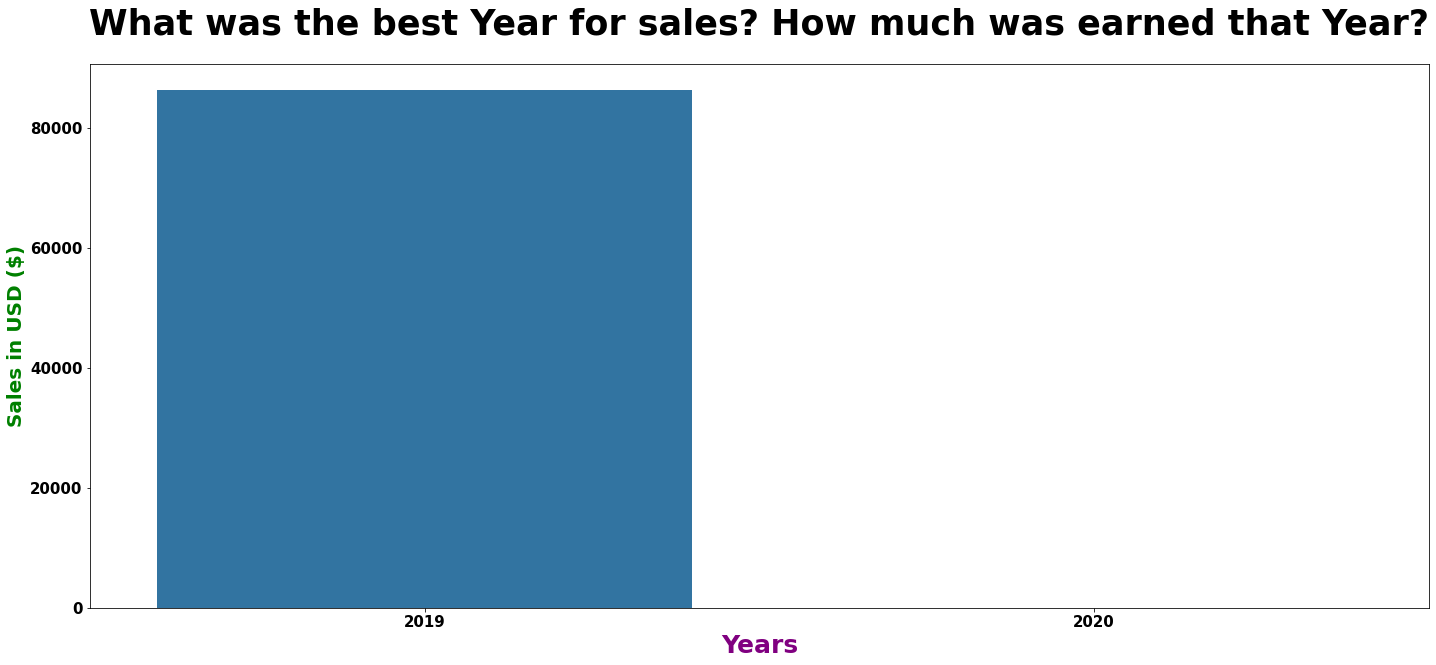

In [ ]:
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes count plot
sns.countplot(
    x="Year",
    data=sales_data
)
plt.title( # title
    "What was the best Year for sales? How much was earned that Year?",
    weight="bold", # weiqht
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Years",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

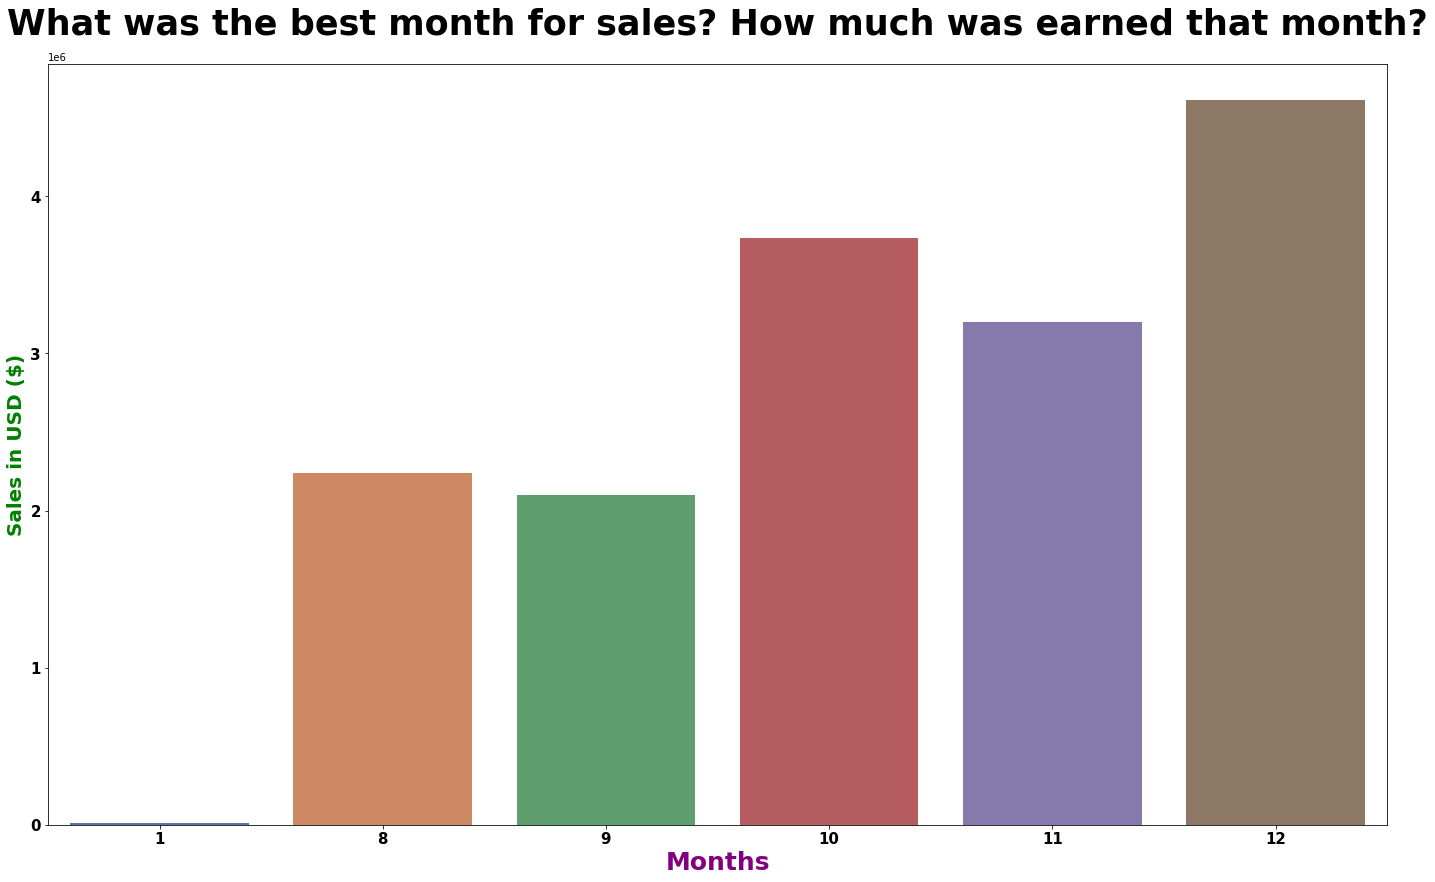

In [ ]:
# group the Month cols
sum_of_month_and_earned = sales_data.groupby('Month').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot
sns.barplot( # barplot
    x=sum_of_month_and_earned.index, # x-axis
    y=sum_of_month_and_earned["Sales"], # y-axis
    data=sum_of_month_and_earned, # data
    palette="deep" # palette
)
plt.title( # title
    "What was the best month for sales? How much was earned that month?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Months",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

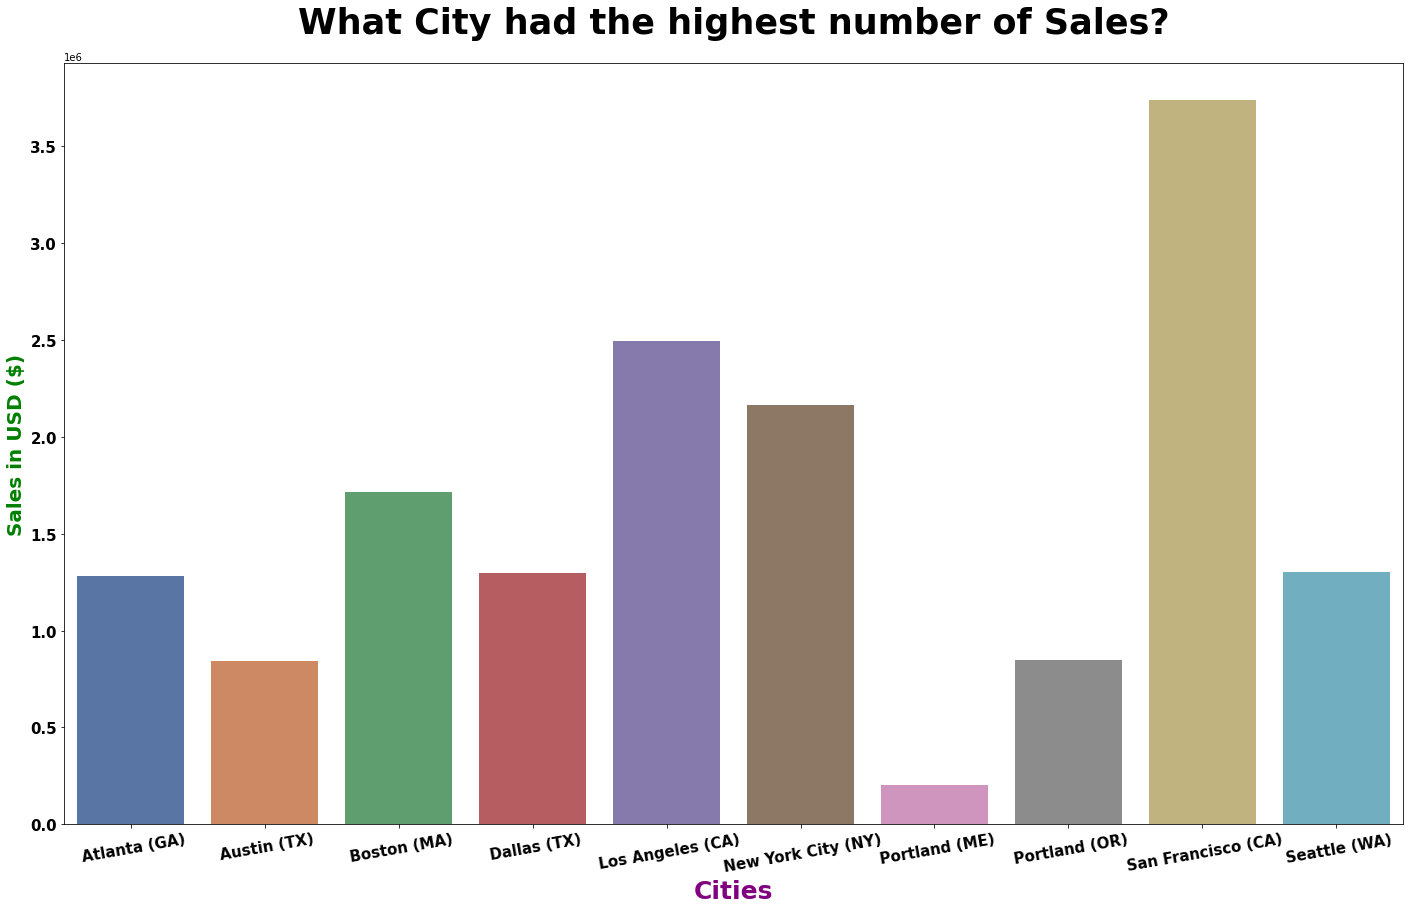

In [ ]:
# group of the highest number of sales in city
highest_number_of_sales = sales_data.groupby('Cities').sum().astype('int')
# let's plot it
plt.figure(figsize=(24, 14)) # figuring the size
# makes bar plot
sns.barplot( # barplot
    x=highest_number_of_sales.index, # x-axis
    y=highest_number_of_sales["Sales"], # y-axis
    data=highest_number_of_sales, # data
    palette="deep" # palette
)
plt.title( # title
    "What City had the highest number of Sales?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
plt.xlabel( # x-label
    "Cities",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    weight="bold", # weight
    fontsize=15, # font-size
    rotation=10
)
plt.ylabel( # y-label
    "Sales in USD ($)",
    weight="bold", # weight
    color="green", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


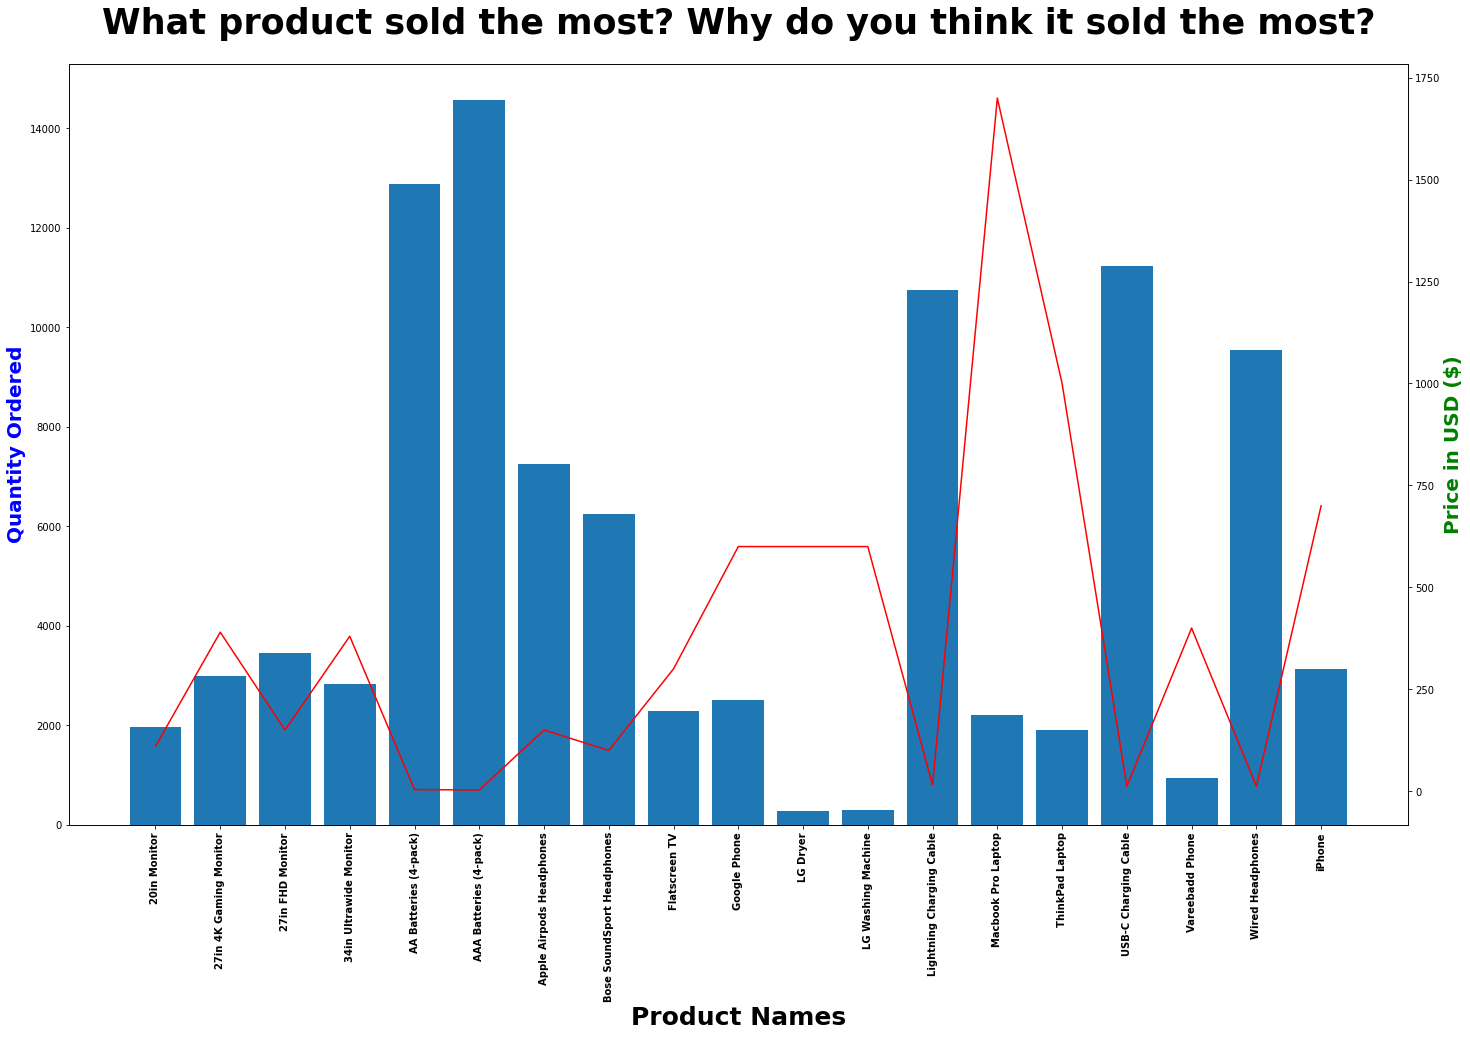

In [ ]:
# lets prepare the varables for the plotting
# group the product
product_group = sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
prices = sales_data.groupby('Product').mean()['Price Each']
products = [product for product, df in product_group]
"""Visualization"""
# let's make subplots
fig, ax1 = plt.subplots(figsize=(24, 14))
ax2 = ax1.twinx()
# AXES 1
ax1.bar(products, quantity_ordered)
ax1.set_title( # title
    "What product sold the most? Why do you think it sold the most?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30 # padding
)
ax1.set_xlabel( # x-label
    "Product Names",
    weight="bold", # weight
    fontsize=25, # font-size
    color="black" # color
)
ax1.set_ylabel( # y-label
    "Quantity Ordered",
    color="blue", # color
    fontsize=20, # font-size
    weight="bold" # weight
)
ax1.set_xticklabels( # x-ticks
    products, # ticks
    rotation="vertical", # rotation
    weight="bold" # weight
)
# AXES 2
sns.lineplot( # plot
    products, # x-axis
    prices, # y-axis
    color="red"
)
ax2.set_ylabel( # y-label
    "Price in USD ($)",
    color="green", # color
    fontsize=20, # font-size
    weight="bold" # weight
);

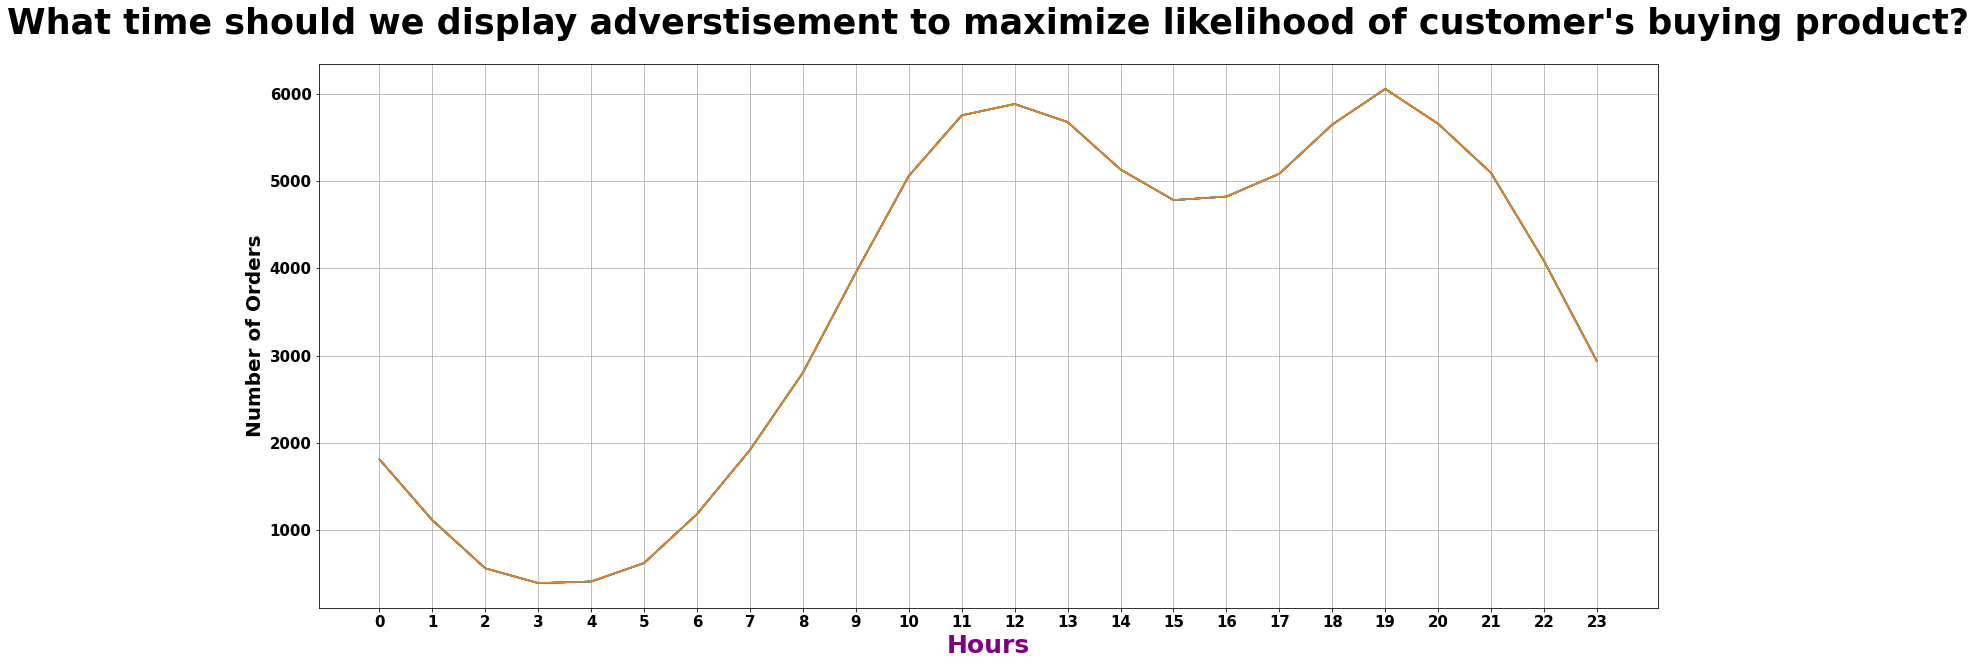

In [ ]:
# let's prepare the value for the x-axis
hours = [hour for hour, df in sales_data.groupby('Hour')]
# let's plot it
plt.figure(figsize=(24, 10)) # figuring the size
# makes bar plot
plt.plot( # plot
    hours, # x-axis
    sales_data.groupby(['Hour']).count() # data
)
# let's add grid
plt.grid(True)
plt.title( # title
    "What time should we display adverstisement to maximize likelihood of customer's buying product?",
    weight="bold", # weight
    fontsize=35, # font-size
    pad=30
)
plt.xlabel( # x-label
    "Hours",
    weight="bold", # weight
    color="purple", # color
    fontsize=25, # font-size
)
plt.xticks( # x-ticks
    ticks=hours, # labels
    weight="bold", # weight
    fontsize=15 # font-size
)
plt.ylabel( # y-label
    "Number of Orders",
    weight="bold", # weight
    color="black", # color
    fontsize=20 # font-size
)
plt.yticks( # y-ticks
    weight="bold", # weight
    fontsize=15 # font-size
);

In [ ]:
from itertools import combinations
from collections import Counter

# drop it using duplicated() funct
data = sales_data[sales_data['Order ID'].duplicated(keep=False)]
# create a new column
data['Grouped'] = sales_data.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
# let's make a new variable
data = data[['Order ID', 'Grouped']].drop_duplicates()
# create a new variable for Counter
count = Counter()
# make a for loop
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
# and make another for loop
for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable') 429
('iPhone', 'Lightning Charging Cable') 429
('iPhone', 'Wired Headphones') 208
('Google Phone', 'Wired Headphones') 192
('iPhone', 'Apple Airpods Headphones') 175
('Vareebadd Phone', 'USB-C Charging Cable') 173
('Google Phone', 'Bose SoundSport Headphones') 101
('USB-C Charging Cable', 'Wired Headphones') 71
('Vareebadd Phone', 'Wired Headphones') 61
('Lightning Charging Cable', 'Wired Headphones') 50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
def statistical_probability(frequency, total_frequency):
    return frequency / total_frequency

product = sales_data.Product.value_counts().sum()

In [ ]:
usb_charging = sales_data[sales_data.Product == 'USB-C Charging Cable'].value_counts().sum()
# Calculating USB-C Charging Probability
P_USB = statistical_probability(usb_charging, product)
Pprime_USB = 1 - P_USB
print('Probability for next people will order USB-C Charging Cable: %.2f%%' % P_USB)
print('Probability for next people will not order USB-C Charging Cable: %.2f%%' % Pprime_USB)

Probability for next people will order USB-C Charging Cable: 0.12%
Probability for next people will not order USB-C Charging Cable: 0.88%
